In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from datetime import datetime
import csv

In [2]:
def make_comptage_df(comptage_filename):

    with open(comptage_filename, 'r') as datafile:
        json_comptage_data = json.load(datafile)
        
    comptage_df = pd.DataFrame(json_comptage_data, columns = ['date', 'comptage'])
    comptage_df['date'] = pd.to_datetime(comptage_df['date'])
    comptage_df.index = comptage_df['date']
    del comptage_df['date']

    return(comptage_df)

In [3]:
def make_weather_df(weather_filename):

    with open(weather_filename, 'r') as datafile:
        weather_df = pd.read_csv(datafile, sep = ',', usecols=['date', 'avg_temperature'])

    weather_df['date'] = pd.to_datetime(weather_df['date'])
    
    weather_df.index = weather_df['date']
    del weather_df['date']
    #weather_df.sort_values(by = ['avg_temperature'])

    
        
    return(weather_df)

In [4]:
weather_filename = 'src/weatherstats_montreal_daily.csv'
weather_df = make_weather_df(weather_filename)
weather_df.head()

,avg_temperature
date,
2018-12-01,-0.09
2018-11-30,0.20
2018-11-29,1.70
2018-11-28,1.35
2018-11-27,0.45


In [5]:
comptage_filename = 'src/100025474.json'
comptage_df = make_comptage_df(comptage_filename)
comptage_df.head()

,comptage
date,
2016-12-01,1562
2016-12-02,1898
2016-12-03,1219
2016-12-04,1224
2016-12-05,776


In [6]:
merge_df = pd.merge(weather_df, comptage_df[['comptage']], on='date')
merge_df.head()

,avg_temperature,comptage
date,,
2018-12-01,-0.09,726
2018-11-30,0.20,1179
2018-11-29,1.70,5746
2018-11-28,1.35,3954
2018-11-27,0.45,2989


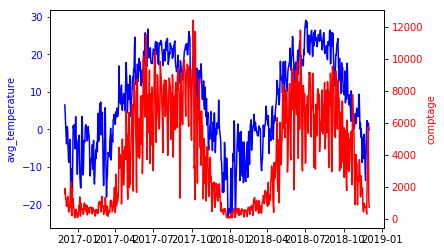

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(merge_df['avg_temperature'], 'blue')
ax1.set_ylabel('avg_temperature', color = 'blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    
ax2 = ax1.twinx()
ax2.plot(merge_df['comptage'], 'red')
ax2.set_ylabel('comptage', color = 'red')
for tl in ax2.get_yticklabels():
    tl.set_color('red')

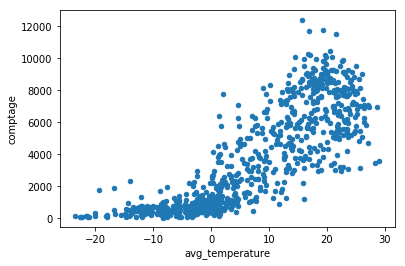

In [8]:
merge_df.plot.scatter(x = 'avg_temperature', y = 'comptage')

In [44]:
merge_df['binned'] = pd.cut(merge_df['avg_temperature'], bins = 5)
s = merge_df['binned'].value_counts()
s

(-2.514, 8.004]       201
(8.004, 18.522]       190
(18.522, 29.04]       174
(-13.032, -2.514]     131
(-23.603, -13.032]     35
Name: binned, dtype: int64

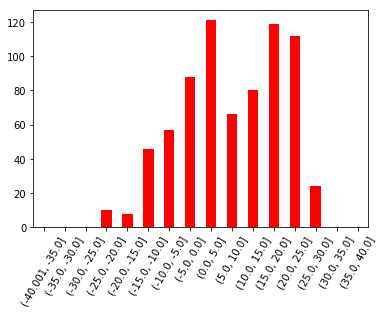

In [32]:
out = pd.cut(merge_df['avg_temperature'], bins = [-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15,20, 25, 30, 35, 40], include_lowest = True)
ax = out.value_counts(sort=False).plot.bar(rot = 60, color = 'red')
plt.show()

In [11]:
out

date
2018-12-01       (-10.0, 10.0]
2018-11-30       (-10.0, 10.0]
2018-11-29       (-10.0, 10.0]
2018-11-28       (-10.0, 10.0]
2018-11-27       (-10.0, 10.0]
2018-11-26       (-10.0, 10.0]
2018-11-25       (-10.0, 10.0]
2018-11-24       (-10.0, 10.0]
2018-11-23    (-30.001, -10.0]
2018-11-22    (-30.001, -10.0]
2018-11-21       (-10.0, 10.0]
2018-11-20       (-10.0, 10.0]
2018-11-19       (-10.0, 10.0]
2018-11-18       (-10.0, 10.0]
2018-11-17       (-10.0, 10.0]
2018-11-16       (-10.0, 10.0]
2018-11-15       (-10.0, 10.0]
2018-11-14       (-10.0, 10.0]
2018-11-13       (-10.0, 10.0]
2018-11-12       (-10.0, 10.0]
2018-11-11       (-10.0, 10.0]
2018-11-10       (-10.0, 10.0]
2018-11-09       (-10.0, 10.0]
2018-11-08       (-10.0, 10.0]
2018-11-07       (-10.0, 10.0]
2018-11-06       (-10.0, 10.0]
2018-11-05       (-10.0, 10.0]
2018-11-04       (-10.0, 10.0]
2018-11-03       (-10.0, 10.0]
2018-11-02       (-10.0, 10.0]
                    ...       
2016-12-30       (-10.0, 10.0]
201